# Sales Analysis

#### Import necessary library

In [266]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Task 1: Merge all files into one csv file

In [359]:
path = "./data"

files = [file for file in os.listdir(path) if file.endswith(".csv")] # only choose csv files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.drop(columns='Unnamed: 0', inplace=True)
all_months_data.head()

all_months_data.to_csv("sales_data_2020.csv", index=False)

#### Read updated data

In [239]:
all_data = pd.read_csv("sales_data_2020.csv")
all_data.head()

,Order ID,Product,Quantity,Price Each,Order Date,Purchase Address
0,34352,34in Ultrawide Monitor,1,379.99,4/28/2020 21:47,"4864 Willow St, Dallas, TX 75001"
1,34353,AA Batteries (4-pack),1,3.84,4/29/2020 06:33,"5103 Jefferson St, Los Angeles, CA 90001"
2,34354,Lightning Charging Cable,1,14.95,4/28/2020 16:38,"6451 7th St, Portland, OR 97035"
3,34355,iPhone,1,700.00,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001"
4,34355,Wired Headphones,1,11.99,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001"


### Task 2: Clean up data

#### Delete row with NaN

In [361]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity,Price Each,Order Date,Purchase Address
0,34352,34in Ultrawide Monitor,1,379.99,4/28/2020 21:47,"4864 Willow St, Dallas, TX 75001"
1,34353,AA Batteries (4-pack),1,3.84,4/29/2020 06:33,"5103 Jefferson St, Los Angeles, CA 90001"
2,34354,Lightning Charging Cable,1,14.95,4/28/2020 16:38,"6451 7th St, Portland, OR 97035"
3,34355,iPhone,1,700.00,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001"
4,34355,Wired Headphones,1,11.99,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001"


#### Find "Or" and delete it

In [362]:
all_data = all_data.loc[all_data['Order Date'] != "Or"]

all_data.head()

,Order ID,Product,Quantity,Price Each,Order Date,Purchase Address
0,34352,34in Ultrawide Monitor,1,379.99,4/28/2020 21:47,"4864 Willow St, Dallas, TX 75001"
1,34353,AA Batteries (4-pack),1,3.84,4/29/2020 06:33,"5103 Jefferson St, Los Angeles, CA 90001"
2,34354,Lightning Charging Cable,1,14.95,4/28/2020 16:38,"6451 7th St, Portland, OR 97035"
3,34355,iPhone,1,700.00,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001"
4,34355,Wired Headphones,1,11.99,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001"


### Task 3: Add a Month column

In [240]:
all_data['Sales'] = all_data['Quantity'] * all_data['Price Each']

all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data['Month Name'] = pd.to_datetime(all_data['Order Date']).dt.month_name()

In [241]:
all_data.head()

,Order ID,Product,Quantity,Price Each,Order Date,Purchase Address,Sales,Month,Month Name
0,34352,34in Ultrawide Monitor,1,379.99,4/28/2020 21:47,"4864 Willow St, Dallas, TX 75001",379.99,4,April
1,34353,AA Batteries (4-pack),1,3.84,4/29/2020 06:33,"5103 Jefferson St, Los Angeles, CA 90001",3.84,4,April
2,34354,Lightning Charging Cable,1,14.95,4/28/2020 16:38,"6451 7th St, Portland, OR 97035",14.95,4,April
3,34355,iPhone,1,700.00,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001",700.00,4,April
4,34355,Wired Headphones,1,11.99,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001",11.99,4,April


### Task 4: Add a City column

In [242]:
def get_city(address):
    return address.split(",")[1]

def get_states(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_states(x)})")

all_data.head()

,Order ID,Product,Quantity,Price Each,Order Date,Purchase Address,Sales,Month,Month Name,City
0,34352,34in Ultrawide Monitor,1,379.99,4/28/2020 21:47,"4864 Willow St, Dallas, TX 75001",379.99,4,April,Dallas (TX)
1,34353,AA Batteries (4-pack),1,3.84,4/29/2020 06:33,"5103 Jefferson St, Los Angeles, CA 90001",3.84,4,April,Los Angeles (CA)
2,34354,Lightning Charging Cable,1,14.95,4/28/2020 16:38,"6451 7th St, Portland, OR 97035",14.95,4,April,Portland (OR)
3,34355,iPhone,1,700.00,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001",700.00,4,April,Dallas (TX)
4,34355,Wired Headphones,1,11.99,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001",11.99,4,April,Dallas (TX)


## Q1: What was the best month for sales? How much was earned that month?

In [244]:
results_by_month = all_data.groupby('Month Name').sum().sort_values('Month', ascending=True)
print(results_by_month)

              Order ID  Quantity    Price Each         Sales   Month
Month Name                                                          
January       65235374     11039  2.089385e+06  2.101235e+06   10154
February     210133931     13807  2.650727e+06  2.662547e+06   25270
March        346760950     13283  2.452181e+06  2.468099e+06   36522
June         648194012     10553  1.979571e+06  1.991444e+06   57930
May          702333509     13533  2.562645e+06  2.574731e+06   62070
April        725206624     18691  3.494039e+06  3.513197e+06   68276
August       943374138     11377  2.133816e+06  2.145011e+06   83200
October     1064768129     10126  1.869906e+06  1.878424e+06   92920
July        1151247825     15825  2.939514e+06  2.953269e+06  102319
September   1558747225     16573  3.077115e+06  3.095023e+06  136278
November    2502300749     21248  3.991029e+06  4.010099e+06  214412
December    3780997029     27477  5.238753e+06  5.264387e+06  302868


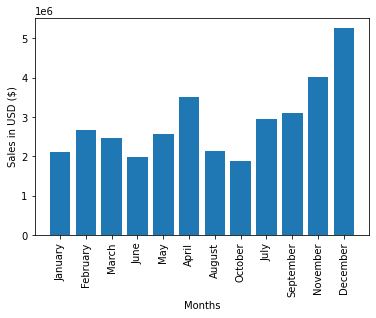

In [245]:
months = results_by_month.index
sales = results_by_month['Sales']

plt.bar(months, sales)

plt.xticks(months, rotation=90)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Months")
plt.show()

## Q2: What city had the highest sales?

In [246]:
results_by_city = all_data.groupby('City').sum().sort_values('Sales', ascending=True)

results_by_city

,Order ID,Quantity,Price Each,Sales,Month
City,,,,,
Portland (ME),185448215,2461,4.840275e+05,4.876121e+05,16096
Portland (OR),726473614,9741,1.836141e+06,1.846614e+06,63248
Austin (TX),753070682,9957,1.849697e+06,1.859031e+06,65407
Dallas (TX),1088126001,14591,2.749860e+06,2.761827e+06,94759
Seattle (WA),1084217195,14468,2.775761e+06,2.788772e+06,94403
Atlanta (GA),1090712362,14666,2.781563e+06,2.794415e+06,94966
Boston (MA),1463778574,19697,3.634545e+06,3.653551e+06,127460
New York City (NY),1824618345,24535,4.603416e+06,4.627543e+06,158821
Los Angeles (CA),2204200350,29589,5.565583e+06,5.591653e+06,191910


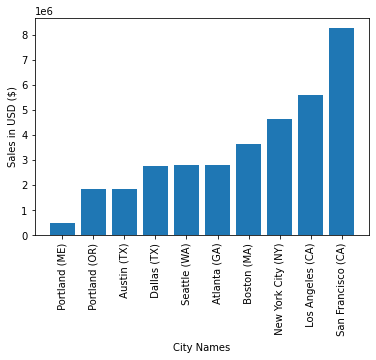

In [247]:
cities = results_by_city.index
sales = results_by_city['Sales']

plt.bar(cities, sales)
plt.xticks(cities, rotation=90)

plt.ylabel("Sales in USD ($)")
plt.xlabel("City Names")
plt.show()

## Q3: What time had the highest sales?

In [248]:
all_data['Order Date (datetime)'] = pd.to_datetime(all_data['Order Date'])

all_data.head()

,Order ID,Product,Quantity,Price Each,Order Date,Purchase Address,Sales,Month,Month Name,City,Order Date (datetime)
0,34352,34in Ultrawide Monitor,1,379.99,4/28/2020 21:47,"4864 Willow St, Dallas, TX 75001",379.99,4,April,Dallas (TX),2020-04-28 21:47:00
1,34353,AA Batteries (4-pack),1,3.84,4/29/2020 06:33,"5103 Jefferson St, Los Angeles, CA 90001",3.84,4,April,Los Angeles (CA),2020-04-29 06:33:00
2,34354,Lightning Charging Cable,1,14.95,4/28/2020 16:38,"6451 7th St, Portland, OR 97035",14.95,4,April,Portland (OR),2020-04-28 16:38:00
3,34355,iPhone,1,700.00,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001",700.00,4,April,Dallas (TX),2020-04-29 18:08:00
4,34355,Wired Headphones,1,11.99,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001",11.99,4,April,Dallas (TX),2020-04-29 18:08:00


In [250]:
all_data['Hour'] = all_data['Order Date (datetime)'].dt.hour

all_data['Day of Week'] = all_data['Order Date (datetime)'].dt.dayofweek
all_data['Day Name'] = all_data['Order Date (datetime)'].dt.day_name()

all_data.head()

,Order ID,Product,Quantity,Price Each,Order Date,Purchase Address,Sales,Month,Month Name,City,Order Date (datetime),Hour,Day of Week,Day Name
0,34352,34in Ultrawide Monitor,1,379.99,4/28/2020 21:47,"4864 Willow St, Dallas, TX 75001",379.99,4,April,Dallas (TX),2020-04-28 21:47:00,21,1,Tuesday
1,34353,AA Batteries (4-pack),1,3.84,4/29/2020 06:33,"5103 Jefferson St, Los Angeles, CA 90001",3.84,4,April,Los Angeles (CA),2020-04-29 06:33:00,6,2,Wednesday
2,34354,Lightning Charging Cable,1,14.95,4/28/2020 16:38,"6451 7th St, Portland, OR 97035",14.95,4,April,Portland (OR),2020-04-28 16:38:00,16,1,Tuesday
3,34355,iPhone,1,700.00,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001",700.00,4,April,Dallas (TX),2020-04-29 18:08:00,18,2,Wednesday
4,34355,Wired Headphones,1,11.99,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001",11.99,4,April,Dallas (TX),2020-04-29 18:08:00,18,2,Wednesday


<AxesSubplot:xlabel='Hour', ylabel='Day Name'>

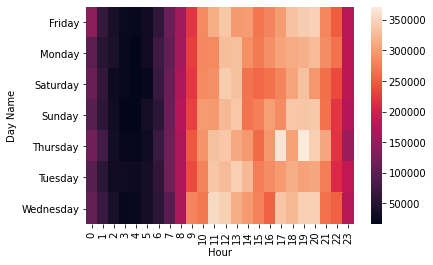

In [257]:
import seaborn as sns

heatmap = all_data.groupby(['Day Name', 'Hour']).sum()['Sales'].unstack()

sns.heatmap(heatmap)

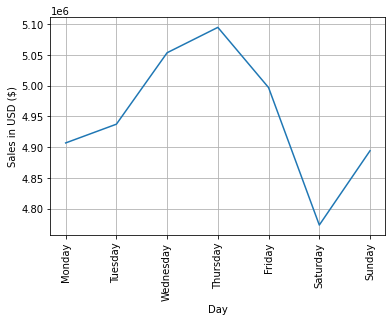

In [495]:
results_by_day = all_data.groupby('Day Name').sum().sort_values('Day of Week')

days = results_by_day.index

sales = results_by_day['Sales']

plt.plot(days, sales)

plt.xlabel("Day")
plt.ylabel("Sales in USD ($)")
plt.xticks(days, rotation=90)
plt.grid()
plt.show()

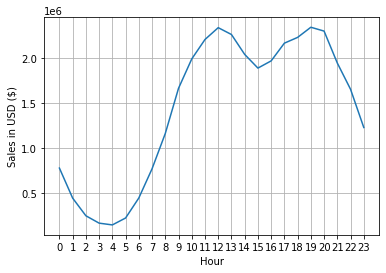

In [252]:
results_by_hour = all_data.groupby('Hour').sum().sort_values(['Hour'])


hours = results_by_hour.index
sales = results_by_hour['Sales']

plt.plot(hours, sales)

plt.xlabel("Hour")
plt.ylabel("Sales in USD ($)")
plt.xticks(hours)
plt.grid()
plt.show()

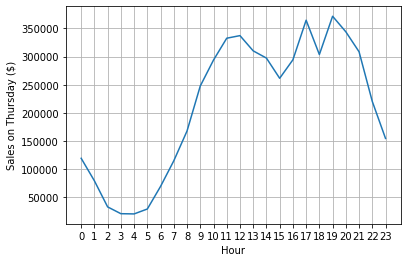

In [281]:
thursday = all_data.loc[all_data['Day Name'] == "Thursday"]

results_on_thursday = thursday.groupby('Hour').sum()['Sales']

index = results_on_thursday.index

plt.plot(results_on_thursday)

plt.xticks(index)
plt.xlabel("Hour")
plt.ylabel("Sales on Thursday ($)")

plt.grid()
plt.show()

The recommendation for advertisement is to target sells on Thursday 20 pm

## Q4: Which products are most often sold together?

In [357]:
duplicated = all_data.loc[all_data['Order ID'].duplicated(keep=False)]

print(len(duplicated))
duplicated.head()

14315


,Order ID,Product,Quantity,Price Each,Order Date,Purchase Address,Sales,Month,Month Name,City,Order Date (datetime),Hour,Day of Week,Day Name
3,34355,iPhone,1,700.00,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001",700.00,4,April,Dallas (TX),2020-04-29 18:08:00,18,2,Wednesday
4,34355,Wired Headphones,1,11.99,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001",11.99,4,April,Dallas (TX),2020-04-29 18:08:00,18,2,Wednesday
8,34359,Lightning Charging Cable,1,14.95,4/23/2020 13:22,"5215 5th St, San Francisco, CA 94016",14.95,4,April,San Francisco (CA),2020-04-23 13:22:00,13,3,Thursday
9,34359,Apple Airpods Headphones,1,150.00,4/23/2020 13:22,"5215 5th St, San Francisco, CA 94016",150.00,4,April,San Francisco (CA),2020-04-23 13:22:00,13,3,Thursday
29,34379,20in Monitor,1,109.99,4/5/2020 14:48,"5924 Hill St, Los Angeles, CA 90001",109.99,4,April,Los Angeles (CA),2020-04-05 14:48:00,14,6,Sunday


In [358]:
duplicated['Grouped'] = duplicated.groupby('Order ID')['Product'].transform(lambda x: (",").join(x))

duplicated.head()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity,Price Each,Order Date,Purchase Address,Sales,Month,Month Name,City,Order Date (datetime),Hour,Day of Week,Day Name,Grouped
3,34355,iPhone,1,700.00,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001",700.00,4,April,Dallas (TX),2020-04-29 18:08:00,18,2,Wednesday,"iPhone,Wired Headphones"
4,34355,Wired Headphones,1,11.99,4/29/2020 18:08,"3785 Main St, Dallas, TX 75001",11.99,4,April,Dallas (TX),2020-04-29 18:08:00,18,2,Wednesday,"iPhone,Wired Headphones"
8,34359,Lightning Charging Cable,1,14.95,4/23/2020 13:22,"5215 5th St, San Francisco, CA 94016",14.95,4,April,San Francisco (CA),2020-04-23 13:22:00,13,3,Thursday,"Lightning Charging Cable,Apple Airpods Headphones"
9,34359,Apple Airpods Headphones,1,150.00,4/23/2020 13:22,"5215 5th St, San Francisco, CA 94016",150.00,4,April,San Francisco (CA),2020-04-23 13:22:00,13,3,Thursday,"Lightning Charging Cable,Apple Airpods Headphones"
29,34379,20in Monitor,1,109.99,4/5/2020 14:48,"5924 Hill St, Los Angeles, CA 90001",109.99,4,April,Los Angeles (CA),2020-04-05 14:48:00,14,6,Sunday,"20in Monitor,Lightning Charging Cable"


In [360]:
df = duplicated[['Order ID', 'Grouped']].drop_duplicates()
print(len(df))
df['Grouped'].head()

6952


3                               iPhone,Wired Headphones
8     Lightning Charging Cable,Apple Airpods Headphones
29                20in Monitor,Lightning Charging Cable
35       Lightning Charging Cable,AA Batteries (4-pack)
53             Thinkpad Laptop,Apple Airpods Headphones
Name: Grouped, dtype: object

In [412]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable'), 1022),
 (('iPhone', 'Lightning Charging Cable'), 1003),
 (('iPhone', 'Wired Headphones'), 543),
 (('iPhone', 'Apple Airpods Headphones'), 398),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 396),
 (('Google Phone', 'Wired Headphones'), 373),
 (('Google Phone', 'Bose SoundSport Headphones'), 230),
 (('Vareebadd Phone', 'Wired Headphones'), 162),
 (('USB-C Charging Cable', 'Wired Headphones'), 145),
 (('Lightning Charging Cable', 'Wired Headphones'), 141)]

## Q5: What product sold the most?

In [496]:
results_by_product = all_data.groupby('Product').sum().sort_values('Product')

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


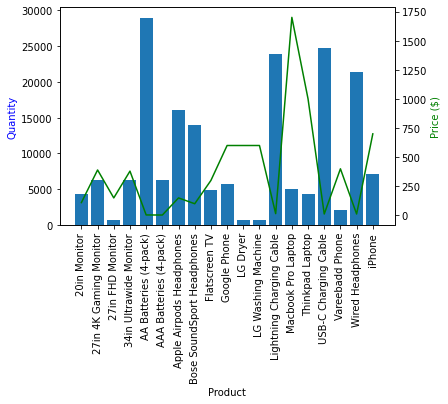

In [499]:
products = results_by_product.index
quantity = results_by_product['Quantity']
price = all_data.groupby('Product').mean().sort_values('Product')['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity)
ax2.plot(products, price, 'g')

ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity", color='b')
ax2.set_ylabel("Price ($)", color='g')

ax1.set_xticklabels(products, rotation=90)

plt.show()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


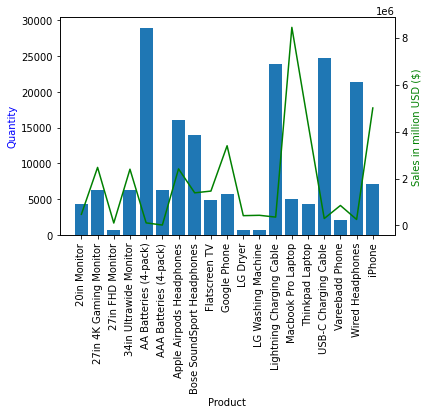

In [500]:
products = results_by_product.index
sales = results_by_product['Sales']
quantity = results_by_product['Quantity']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity)
ax2.plot(products, sales, 'g')

ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity", color='b')
ax2.set_ylabel("Sales in million USD ($)", color='g')

ax1.set_xticklabels(products, rotation=90)

plt.show()